# Predicting Energy Consumption in Smart Cities Using Linear Regression

step 1 :- import libraries 


In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score



Step 2 :- load the data 

In [7]:
data = pd.read_csv(r'D:\data sets\ENB2012_data.csv')
print(data.head())

     X1     X2     X3      X4   X5   X6   X7   X8     Y1     Y2  Unnamed: 10  \
0  0.98  514.5  294.0  110.25  7.0  2.0  0.0  0.0  15.55  21.33          NaN   
1  0.98  514.5  294.0  110.25  7.0  3.0  0.0  0.0  15.55  21.33          NaN   
2  0.98  514.5  294.0  110.25  7.0  4.0  0.0  0.0  15.55  21.33          NaN   
3  0.98  514.5  294.0  110.25  7.0  5.0  0.0  0.0  15.55  21.33          NaN   
4  0.90  563.5  318.5  122.50  7.0  2.0  0.0  0.0  20.84  28.28          NaN   

   Unnamed: 11  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  


In [8]:
# clean the data 
data = data.filter(regex="^(?!Unnamed)", axis=1)
print(data.head())

     X1     X2     X3      X4   X5   X6   X7   X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0  2.0  0.0  0.0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0  3.0  0.0  0.0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0  4.0  0.0  0.0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0  5.0  0.0  0.0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0  2.0  0.0  0.0  20.84  28.28


In [9]:
# define Features and target 
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
target_1 = 'Y1'  
target_2 = 'Y2'


X=data[features]
y1 = data[target_1]
y2= data[target_2]


In [10]:
# handle Missing values 
X.fillna(X.mean())

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.980000,514.500000,294.0,110.250000,7.00,2.0,0.000000,0.0000
1,0.980000,514.500000,294.0,110.250000,7.00,3.0,0.000000,0.0000
2,0.980000,514.500000,294.0,110.250000,7.00,4.0,0.000000,0.0000
3,0.980000,514.500000,294.0,110.250000,7.00,5.0,0.000000,0.0000
4,0.900000,563.500000,318.5,122.500000,7.00,2.0,0.000000,0.0000
...,...,...,...,...,...,...,...,...
1291,0.764167,671.708333,318.5,176.604167,5.25,3.5,0.234375,2.8125
1292,0.764167,671.708333,318.5,176.604167,5.25,3.5,0.234375,2.8125
1293,0.764167,671.708333,318.5,176.604167,5.25,3.5,0.234375,2.8125
1294,0.764167,671.708333,318.5,176.604167,5.25,3.5,0.234375,2.8125


In [11]:
#splite data into Train and Test sets 

X_train,X_test,y1_train,y1_test=train_test_split(X,y1,test_size=0.2,random_state=42)
X_train,X_test,y2_train,y2_test=train_test_split(X,y2,test_size=0.2,random_state=42)


In [12]:
# train linear Regression models
X_train_clean=X_train.dropna()


In [13]:
y1_train_clean=y1_train[X_train_clean.index]
y2_train_clean=y2_train[X_train_clean.index]



In [16]:

y_train_clean = np.column_stack((y1_train_clean,y2_train_clean))
y_train_clean = pd.DataFrame(y_train_clean)
y_train_clean = y_train_clean.dropna()
model = LinearRegression()
model.fit(X_train_clean,y_train_clean)

LinearRegression()

In [17]:
y_pred_train = model.predict(X_train_clean)

In [20]:

# Evaluate the model's performance using the training set
mae = mean_absolute_error(y_train_clean, y_pred_train)
mse = mean_squared_error(y_train_clean, y_pred_train)
r2 = r2_score(y_train_clean, y_pred_train)


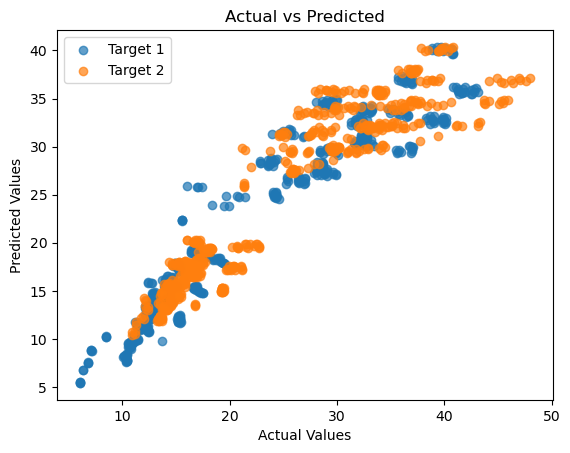

In [21]:
plt.scatter(y_train_clean.iloc[:, 0], y_pred_train[:, 0], label='Target 1', alpha=0.7)
plt.scatter(y_train_clean.iloc[:, 1], y_pred_train[:, 1], label='Target 2', alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()